# **1. Import Library**

In [1]:
#Import Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Import Data CSV

df = pd.read_csv('./Final_Dataset_Klasifikasi.csv')

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,1


In [3]:
# Struktur Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2282 non-null   object 
 1   AccountID                2282 non-null   object 
 2   TransactionAmount        2282 non-null   float64
 3   TransactionDate          2282 non-null   object 
 4   TransactionType          2282 non-null   object 
 5   Location                 2282 non-null   object 
 6   DeviceID                 2282 non-null   object 
 7   IP Address               2282 non-null   object 
 8   MerchantID               2282 non-null   object 
 9   Channel                  2282 non-null   object 
 10  CustomerAge              2282 non-null   int64  
 11  CustomerOccupation       2282 non-null   object 
 12  TransactionDuration      2282 non-null   int64  
 13  LoginAttempts            2282 non-null   int64  
 14  AccountBalance          

In [4]:
# Statistik Deskriptif Data Numerik

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
count,2282.000000,2282.000000,2282.000000,2282.0,2282.000000,2282.000000
mean,255.525596,44.682734,118.972831,1.0,5119.550140,0.799737
std,217.793773,17.711957,69.853628,0.0,3881.419806,0.832136
min,0.260000,18.000000,10.000000,1.0,101.250000,0.000000
25%,77.847500,27.000000,63.000000,1.0,1515.460000,0.000000
50%,198.315000,45.000000,111.000000,1.0,4762.410000,1.000000
75%,376.255000,59.000000,161.000000,1.0,7641.830000,2.000000
max,903.190000,80.000000,300.000000,1.0,14977.990000,2.000000


In [5]:
# Inisialisasi LabelEncoder
encoders = {}

# Identifikasi kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

# Label Encoding
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Langsung ubah di df
    encoders[col] = le  # Simpan encoder untuk setiap kolom

In [6]:
# Pilih hanya kolom numerik selain 'Cluster'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(['Cluster'])

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Transformasi data numerik
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Menampilkan hasil standarisasi
print(df.describe())

       TransactionID    AccountID  TransactionAmount  TransactionDate  \
count    2282.000000  2282.000000       2.282000e+03      2282.000000   
mean     1140.500000   246.307187      -1.323316e-16      1140.500000   
std       658.900979   143.422269       1.000219e+00       658.900979   
min         0.000000     0.000000      -1.172309e+00         0.000000   
25%       570.250000   123.000000      -8.159877e-01       570.250000   
50%      1140.500000   250.000000      -2.627400e-01      1140.500000   
75%      1710.750000   368.750000       5.544505e-01      1710.750000   
max      2281.000000   493.000000       2.974403e+00      2281.000000   

       TransactionType     Location     DeviceID   IP Address   MerchantID  \
count      2282.000000  2282.000000  2282.000000  2282.000000  2282.000000   
mean          0.773006    21.076687   338.001753   293.542068    48.573620   
std           0.418980    12.284826   196.122205   168.225062    28.995518   
min           0.000000     0.0

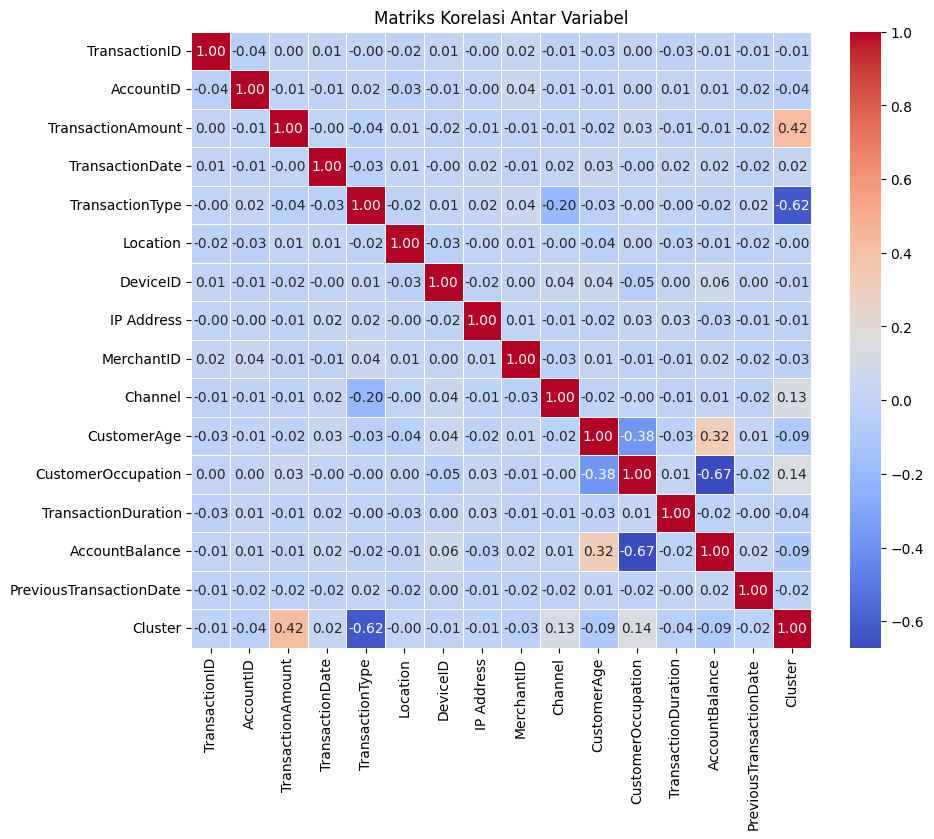

In [7]:
# Hapus fitur Login Attempts
df.drop(columns=['LoginAttempts'], inplace=True)

# Hitung matriks korelasi
corr_matrix = df.corr()

# Plot matriks korelasi menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

In [8]:
print(df['Cluster'].value_counts())

Cluster
0    1064
1     611
2     607
Name: count, dtype: int64


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [9]:
# Pilih fitur (X) dan target (y)
X = df[['TransactionAmount', 'TransactionType', 'CustomerOccupation', 'Channel', 'CustomerAge', 'AccountBalance']] 
y = df['Cluster'].astype(int)

# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1825, 6)
Testing set size: (457, 6)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [10]:
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
logreg_model.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [12]:
y_pred_logreg = logreg_model.predict(X_test) 
y_pred_rf = rf_model.predict(X_test)

Evaluasi Logistic Regression:
Akurasi: 0.9781181619256017
F1-Score: 0.9773011393912435
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       213
           1       1.00      0.96      0.98       122
           2       0.97      0.98      0.97       122

    accuracy                           0.98       457
   macro avg       0.98      0.98      0.98       457
weighted avg       0.98      0.98      0.98       457



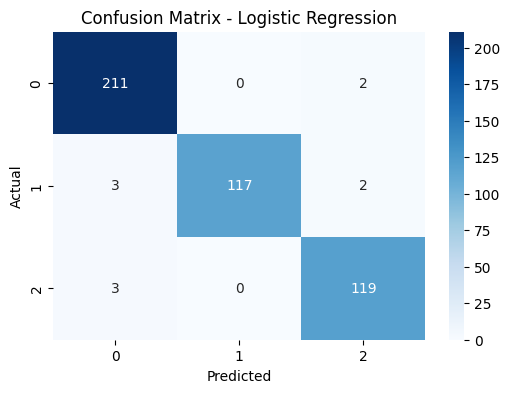

In [13]:
print("Evaluasi Logistic Regression:")
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Evaluasi Random Forest:
Akurasi: 0.975929978118162
F1-Score: 0.975128390644342
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       213
           1       0.98      0.96      0.97       122
           2       0.98      0.98      0.98       122

    accuracy                           0.98       457
   macro avg       0.98      0.97      0.98       457
weighted avg       0.98      0.98      0.98       457



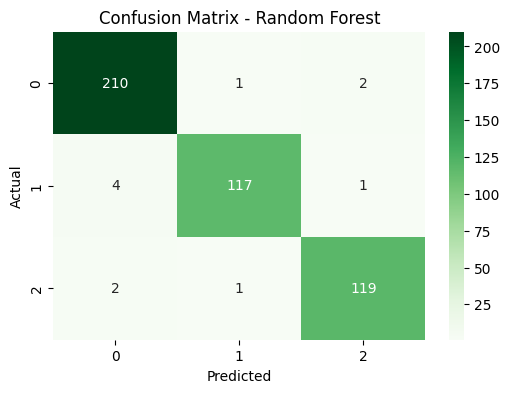

In [14]:
print("Evaluasi Random Forest:")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Berdasarkan hasil evaluasi, baik model **Logistic Regression** maupun **Random Forest** menunjukkan performa yang sangat baik dalam klasifikasi data dengan tiga kelas. Logistic Regression mencapai akurasi **97.81%**, sementara Random Forest sedikit lebih rendah dengan **97.59%**, tetapi tetap sangat kompetitif. Nilai **F1-score makro** dari kedua model juga hampir sama, yaitu **97.73% untuk Logistic Regression** dan **97.51% untuk Random Forest**, menunjukkan keseimbangan yang baik antara precision dan recall di semua kelas. 

Dari classification report, terlihat bahwa semua kelas memiliki nilai precision dan recall yang tinggi, dengan Logistic Regression sedikit lebih unggul dalam menangani kelas 1 dibanding Random Forest. Namun, perbedaannya sangat kecil, sehingga kedua model dapat dianggap sama-sama efektif untuk tugas klasifikasi ini. Jika prioritas utama adalah interpretabilitas, Logistic Regression lebih disarankan. Namun, jika yang diutamakan adalah fleksibilitas dan kemampuan menangani hubungan non-linear, maka Random Forest bisa menjadi pilihan yang lebih baik.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [15]:
# Hyperparameter tuning untuk Logistic Regression
logreg_params = {
    'solver': ['lbfgs', 'saga'],
    'C': [0.1, 1, 10],
    'max_iter': [200, 500, 1000]
}

grid_logreg = GridSearchCV(LogisticRegression(multi_class='multinomial', random_state=42), 
                            param_grid=logreg_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", grid_logreg.best_params_)
print("Best Logistic Regression Accuracy:", grid_logreg.best_score_)

Best Logistic Regression Parameters: {'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.9863013698630138


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [16]:
# Hyperparameter tuning untuk Random Forest

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                        param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest Accuracy:", grid_rf.best_score_)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.9758904109589039


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluasi Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       213
           1       1.00      0.96      0.98       122
           2       0.97      0.98      0.97       122

    accuracy                           0.98       457
   macro avg       0.98      0.98      0.98       457
weighted avg       0.98      0.98      0.98       457

Akurasi: 0.9781181619256017
F1-Score: 0.9773011393912435


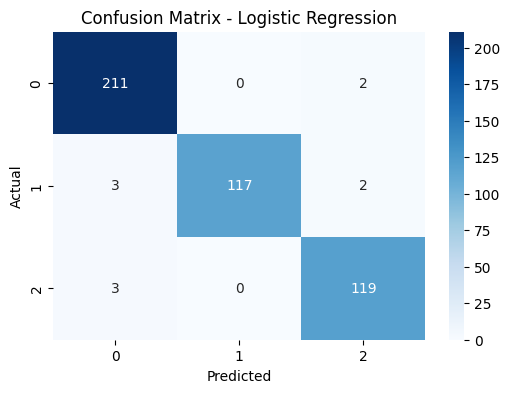

In [17]:
best_logreg_model = LogisticRegression(C=10, max_iter=200, solver='lbfgs', random_state=42)
best_logreg_model.fit(X_train, y_train)

print("Evaluasi Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg, average='macro'))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Evaluasi Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       213
           1       0.98      0.96      0.97       122
           2       0.98      0.98      0.98       122

    accuracy                           0.98       457
   macro avg       0.98      0.97      0.98       457
weighted avg       0.98      0.98      0.98       457

Akurasi: 0.975929978118162
F1-Score: 0.975128390644342


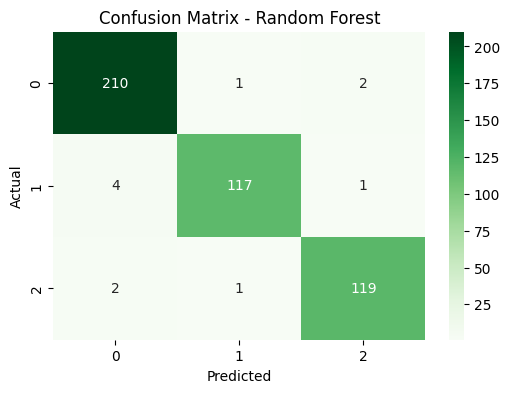

In [18]:
# Melatih ulang Random Forest dengan parameter terbaik
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

print("\nEvaluasi Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='macro'))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Dari hasil evaluasi sebelum dan setelah tuning, tampaknya **tidak ada perubahan signifikan** dalam performa model Logistic Regression dan Random Forest. Akurasi dan F1-score tetap sama, menunjukkan bahwa parameter tuning yang diterapkan tidak memberikan peningkatan yang berarti.

### **Identifikasi Kelemahan Model**
   - Parameter yang dipilih dari Grid Search tidak memberikan dampak positif terhadap hasil evaluasi.
   - Akurasi yang tinggi pada dataset ini menunjukkan bahwa model cukup baik dalam memprediksi, tetapi perlu diuji lebih lanjut pada dataset baru untuk memastikan tidak terjadi overfitting.
   - Kelas tertentu (misalnya kelas 1) memiliki Recall lebih rendah dibandingkan precision, yang berarti ada beberapa sampel yang salah diklasifikasikan.

### **Rekomendasi Tindakan Lanjutan**
   - Eksperimen dengan parameter lain yang lebih luas
   - Gunakan teknik lain untuk hyperparameter tuning
   - Periksa distribusi data dan fitur  
   - Coba algoritma lain jika diperlukan